<a href="https://colab.research.google.com/github/pranavgarg1506/deeplearning/blob/main/cnn_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt

In [2]:
print("version of numpy is ",np.__version__)
print("version of pandas is ",pd.__version__)
print("version of tensorflow is ",tf.__version__)

version of numpy is  1.19.5
version of pandas is  1.1.5
version of tensorflow is  2.4.1


In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
x_train.max(), x_train.min()

(255, 0)

In [5]:
## standardinzing the data
x_train = x_train / 255
x_test = x_test / 255



## categorizing the dependent variable
y_cat_train = tf.keras.utils.to_categorical(y_train)
y_cat_test = tf.keras.utils.to_categorical(y_test)

In [6]:
## training and test data should be in shape
## no_of_images, height, width, channel_numbers

print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [7]:
## making the model

model = tf.keras.models.Sequential()

## adding first layer
model.add(tf.keras.layers.Conv2D(64, (5,5), strides=(1,1), padding='valid', input_shape=(32,32,3), activation='relu')  )
## o/p shape --> 28,28,64
model.add(tf.keras.layers.MaxPool2D(pool_size= (2,2)) )
## o/p shape --> 14,14,64

## adding second layer
model.add(tf.keras.layers.Conv2D(128, (5,5), strides=(1,1), padding='valid', activation='relu')  )
## o/p shape  --> 10,10,128
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)) )
## o/p shape  --> 5,5,128

## adding third layer
model.add(tf.keras.layers.Flatten() )
## o/p shape  --> 1,3200

model.add( tf.keras.layers.Dense(256, activation='relu')  )
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 128)       204928    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               819456    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [9]:
model.fit(x_train,y_cat_train,epochs=15,verbose=1,validation_data=(x_test, y_cat_test),batch_size=200)

Epoch 1/15
250/250 [==============================] - 5s 11ms/step - loss: 1.7965 - accuracy: 0.3368 - val_loss: 1.3077 - val_accuracy: 0.5337
Epoch 2/15
250/250 [==============================] - 2s 9ms/step - loss: 1.2458 - accuracy: 0.5551 - val_loss: 1.0890 - val_accuracy: 0.6148
Epoch 3/15
250/250 [==============================] - 2s 9ms/step - loss: 1.0468 - accuracy: 0.6355 - val_loss: 1.0294 - val_accuracy: 0.6401
Epoch 4/15
250/250 [==============================] - 2s 9ms/step - loss: 0.9143 - accuracy: 0.6807 - val_loss: 0.9888 - val_accuracy: 0.6530
Epoch 5/15
250/250 [==============================] - 2s 9ms/step - loss: 0.8158 - accuracy: 0.7180 - val_loss: 0.9016 - val_accuracy: 0.6889
Epoch 6/15
250/250 [==============================] - 2s 9ms/step - loss: 0.7363 - accuracy: 0.7465 - val_loss: 0.8498 - val_accuracy: 0.7088
Epoch 7/15
250/250 [==============================] - 2s 9ms/step - loss: 0.6732 - accuracy: 0.7677 - val_loss: 0.8549 - val_accuracy: 0.7057
Epoch

In [10]:
df = pd.DataFrame(model.history.history)
df.tail()

,loss,accuracy,val_loss,val_accuracy
10,0.428208,0.85204,0.881758,0.7193
11,0.374869,0.87076,0.935862,0.7198
12,0.320235,0.89152,0.973165,0.7167
13,0.279278,0.90436,1.071038,0.7097
14,0.227723,0.92404,1.076035,0.7168


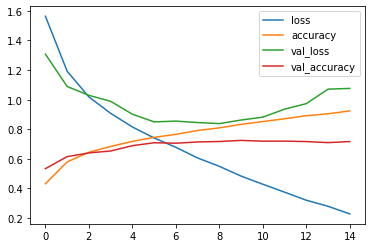

In [11]:
df.plot()

In [12]:
from sklearn import metrics

In [13]:
model.evaluate(x_test, y_cat_test,verbose=1)

313/313 [==============================] - 1s 4ms/step - loss: 1.0760 - accuracy: 0.7168


[1.0760343074798584, 0.7167999744415283]

In [14]:
model.evaluate(x_train, y_cat_train,verbose=1)

1563/1563 [==============================] - 5s 3ms/step - loss: 0.1924 - accuracy: 0.9365


[0.1924106776714325, 0.936519980430603]

In [15]:
y_pred = model.predict_classes(x_test)
print(y_pred)

metrics.confusion_matrix(y_test,y_pred)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[3 8 8 ... 5 4 7]


array([[741,  18,  49,  27,  28,   3,  14,  12,  69,  39],
       [ 12, 804,   6,  14,   3,   3,  12,   0,  38, 108],
       [ 57,   7, 609,  69,  98,  39,  60,  34,  14,  13],
       [ 23,  17,  91, 540,  95,  97,  54,  39,  16,  28],
       [  6,   5,  68,  40, 746,  13,  36,  69,  14,   3],
       [ 11,   3,  75, 232,  80, 476,  21,  78,  11,  13],
       [  7,  10,  41,  74,  56,  20, 767,   7,   9,   9],
       [ 18,   5,  37,  41,  65,  26,   6, 791,   1,  10],
       [ 42,  25,   9,  12,   9,   2,   7,   7, 857,  30],
       [ 24,  65,   6,  17,   4,   4,   3,  13,  27, 837]])

[1]


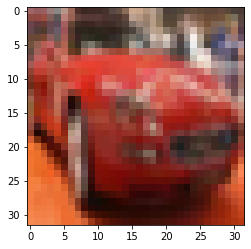

In [16]:
my_img = x_train[5]

plt.imshow(my_img)
print(y_train[5])

In [17]:
model.predict_classes(my_img.reshape(1,32,32,3))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([1])